# Machine Learning Foundation

## NBA Draft stats

#### Dataset description
A dataset which contains a list of players of selected in draft of nba, and their results in league and how much their recevied for their work

 - [Dataset link](https://data.world/datadavis/nba-salaries)

#### Features list
- Sallary
- Name
- Position
- Team
- College
- Draft Year
- Draft Team
- Draft Round
- Assistances
- Efective Field Goal
- Efective Field Goal 3
- Free throws
- Games
- Player Efficiency Rating
- Points
- Total Rebounds
- Win Shares
- Effective Field Goal
- Draft Round
- High School
- Shoots
- weight


### Initial Plan
Explorate and avaliate the quality and quantity of data, appling technics of data cleaning and feature engineering to obtain insigths and formulatee hypoteses about sallary and basketball statics for players of draft.

In [23]:
%pylab inline
%config InlineBackend.figure_formats = ['retina']

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

filepath = "data/players.csv"

data = pd.read_csv(filepath)

data.head()

Populating the interactive namespace from numpy and matplotlib


,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb
1,abdulza01,"April 7, 1946","Brooklyn, New York",1.2,42.8,NaN,72.8,505,15.1,9.0,8.0,17.5,NaN,Iowa State University,5th overall,1st round,Cincinnati Royals,1968,6-9,"John Jay in Brooklyn, New York",Zaid Abdul-Aziz,Power Forward and Center,Right,235lb
2,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb
3,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb
4,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb


In [24]:
filesalaries = "data/salaries_1985to2018.csv"
salaries_data = pd.read_csv(filesalaries)
salaries_data.head()

,league,player_id,salary,season,season_end,season_start,team
0,NBA,abdelal01,395000,1990-91,1991,1990,Portland Trail Blazers
1,NBA,abdelal01,494000,1991-92,1992,1991,Portland Trail Blazers
2,NBA,abdelal01,500000,1992-93,1993,1992,Boston Celtics
3,NBA,abdelal01,805000,1993-94,1994,1993,Boston Celtics
4,NBA,abdelal01,650000,1994-95,1995,1994,Sacramento Kings


In [25]:
salaries_data["salary"] = pd.to_numeric(salaries_data["salary"], downcast="float")
sal_data = salaries_data.groupby('player_id')['salary'].mean()
nba_data = pd.merge(data, sal_data, on="player_id")
nba_data.head()

,player_id,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,salary
0,abdelal01,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25th overall,1st round,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,568800.0
1,abdulka01,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1st overall,1st round,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,2140000.0
2,abdulma02,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3rd overall,1st round,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,2205500.0
3,abdulta01,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11th overall,1st round,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,3798280.0
4,abdursh01,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,University of California,3rd overall,1st round,Vancouver Grizzlies,1996,6-9,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225lb,8715091.0


In [26]:
#some observations

print('row number', nba_data.shape[0])
print('collum number', nba_data.shape[1])
print('feature names', nba_data.columns.tolist())
print('College list',len(nba_data.college.unique()))
print('High School names', len(nba_data.highSchool.unique()))

row number 2408
collum number 25
feature names ['player_id', 'birthDate', 'birthPlace', 'career_AST', 'career_FG%', 'career_FG3%', 'career_FT%', 'career_G', 'career_PER', 'career_PTS', 'career_TRB', 'career_WS', 'career_eFG%', 'college', 'draft_pick', 'draft_round', 'draft_team', 'draft_year', 'height', 'highSchool', 'name', 'position', 'shoots', 'weight', 'salary']
College list 496
High School names 1620


### Data Cleaning and Feature engineering explanation

- Merged datasets for get mean of salaries of each player recevied in carrer
- Remove the player_id field, a unique field cannot be supply valid information to a data analyse.
- Remove string contens of draft pick
- Remove string contents of draft round
- Remane name of statics columns of nba standards use with help of [NBA Glossary](https://www.basketball-reference.com/about/glossary.html)
- Convert draft_pick and draft_round for float
- Identify and treat outliers, we chose remove outliers because would compromise analyses.
- save the filtred dataset in a new csv file

In [27]:
# remove columns that dont is dont necessary for analyses n

nba_data1 = nba_data.copy()
del nba_data1['player_id']

nba_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2408 entries, 0 to 2407
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   birthDate    2408 non-null   object 
 1   birthPlace   2408 non-null   object 
 2   career_AST   2408 non-null   float64
 3   career_FG%   2408 non-null   object 
 4   career_FG3%  2408 non-null   object 
 5   career_FT%   2408 non-null   object 
 6   career_G     2408 non-null   int64  
 7   career_PER   2408 non-null   object 
 8   career_PTS   2408 non-null   float64
 9   career_TRB   2408 non-null   object 
 10  career_WS    2408 non-null   object 
 11  career_eFG%  2408 non-null   object 
 12  college      2139 non-null   object 
 13  draft_pick   1884 non-null   object 
 14  draft_round  1884 non-null   object 
 15  draft_team   1884 non-null   object 
 16  draft_year   1884 non-null   object 
 17  height       2408 non-null   object 
 18  highSchool   2200 non-null   object 
 19  name  

In [28]:
nba_data1.dropna(inplace=True)
nba_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 2404
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   birthDate    1666 non-null   object 
 1   birthPlace   1666 non-null   object 
 2   career_AST   1666 non-null   float64
 3   career_FG%   1666 non-null   object 
 4   career_FG3%  1666 non-null   object 
 5   career_FT%   1666 non-null   object 
 6   career_G     1666 non-null   int64  
 7   career_PER   1666 non-null   object 
 8   career_PTS   1666 non-null   float64
 9   career_TRB   1666 non-null   object 
 10  career_WS    1666 non-null   object 
 11  career_eFG%  1666 non-null   object 
 12  college      1666 non-null   object 
 13  draft_pick   1666 non-null   object 
 14  draft_round  1666 non-null   object 
 15  draft_team   1666 non-null   object 
 16  draft_year   1666 non-null   object 
 17  height       1666 non-null   object 
 18  highSchool   1666 non-null   object 
 19  name  

In [29]:
# remove strings in draft_round for get only rounds
nba_data1.draft_round = nba_data1.draft_round.str.replace('st round', '')
nba_data1.draft_round = nba_data1.draft_round.str.replace('rd round', '')
nba_data1.draft_round = nba_data1.draft_round.str.replace('nd round', '')
nba_data1.draft_round = nba_data1.draft_round.str.replace('th round', '')

nba_data1.draft_pick = nba_data1.draft_pick.str.replace('st overall', '')
nba_data1.draft_pick = nba_data1.draft_pick.str.replace('rd overall', '')
nba_data1.draft_pick = nba_data1.draft_pick.str.replace('nd overall', '')
nba_data1.draft_pick = nba_data1.draft_pick.str.replace('th overall', '')

nba_data1.head()

,birthDate,birthPlace,career_AST,career_FG%,career_FG3%,career_FT%,career_G,career_PER,career_PTS,career_TRB,career_WS,career_eFG%,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,salary
0,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25,1,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,568800.0
1,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1,1,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,2140000.0
2,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3,1,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,2205500.0
3,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11,1,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,3798280.0
4,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,University of California,3,1,Vancouver Grizzlies,1996,6-9,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225lb,8715091.0


In [30]:
nba_data1.rename(columns={'career_AST': 'assistences'}, inplace=True)
nba_data1.rename(columns={'career_FG%': 'field_goal_percentage'}, inplace=True)
nba_data1.rename(columns={'career_FG3%': 'field_goal_percentage_3_pts'}, inplace=True)
nba_data1.rename(columns={'career_FT%': 'free_throw_percentage'}, inplace=True)
nba_data1.rename(columns={'career_G': 'games'}, inplace=True)
nba_data1.rename(columns={'career_PER': 'player_efficiency_rating'}, inplace=True)
nba_data1.rename(columns={'career_PTS': 'points'}, inplace=True)
nba_data1.rename(columns={'career_TRB': 'total_rebounds'}, inplace=True)
nba_data1.rename(columns={'career_WS': 'win_shares'}, inplace=True)
nba_data1.rename(columns={'career_eFG%': 'effective_field_goal_percentage'}, inplace=True)
		
nba_data1.head()

,birthDate,birthPlace,assistences,field_goal_percentage,field_goal_percentage_3_pts,free_throw_percentage,games,player_efficiency_rating,points,total_rebounds,win_shares,effective_field_goal_percentage,college,draft_pick,draft_round,draft_team,draft_year,height,highSchool,name,position,shoots,weight,salary
0,"June 24, 1968","Cairo, Egypt",0.3,50.2,0.0,70.1,256,13.0,5.7,3.3,4.8,50.2,Duke University,25,1,Portland Trail Blazers,1990,6-10,"Bloomfield in Bloomfield, New Jersey",Alaa Abdelnaby,Power Forward,Right,240lb,568800.0
1,"April 16, 1947","New York, New York",3.6,55.9,5.6,72.1,1560,24.6,24.6,11.2,273.4,55.9,"University of California, Los Angeles",1,1,Milwaukee Bucks,1969,7-2,"Power Memorial in New York, New York",Kareem Abdul-Jabbar,Center,Right,225lb,2140000.0
2,"March 9, 1969","Gulfport, Mississippi",3.5,44.2,35.4,90.5,586,15.4,14.6,1.9,25.2,47.2,Louisiana State University,3,1,Denver Nuggets,1990,6-1,"Gulfport in Gulfport, Mississippi",Mahmoud Abdul-Rauf,Point Guard,Right,162lb,2205500.0
3,"November 3, 1974","Maisons Alfort, France",1.1,41.7,23.7,70.3,236,11.4,7.8,3.3,3.5,42.2,"University of Michigan, San Jose State University",11,1,Sacramento Kings,1997,6-6,"Lycee Aristide Briand in Evreux, France",Tariq Abdul-Wahad,Shooting Guard,Right,223lb,3798280.0
4,"December 11, 1976","Marietta, Georgia",2.5,47.2,29.7,81.0,830,19.0,18.1,7.5,71.2,47.9,University of California,3,1,Vancouver Grizzlies,1996,6-9,"Wheeler in Marietta, Georgia",Shareef Abdur-Rahim,Center and Small Forward and Power Forward,Right,225lb,8715091.0


In [31]:
nba_data1["draft_pick"] = pd.to_numeric(nba_data1["draft_pick"], downcast="float")
nba_data1["draft_round"] = pd.to_numeric(nba_data1["draft_round"], downcast="float")
print(nba_data1.draft_pick)

0       25.0
1        1.0
2        3.0
3       11.0
4        3.0
        ... 
2397    56.0
2399     4.0
2401    17.0
2403    22.0
2404    41.0
Name: draft_pick, Length: 1666, dtype: float32


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f703a94d0>,
      dtype=object)

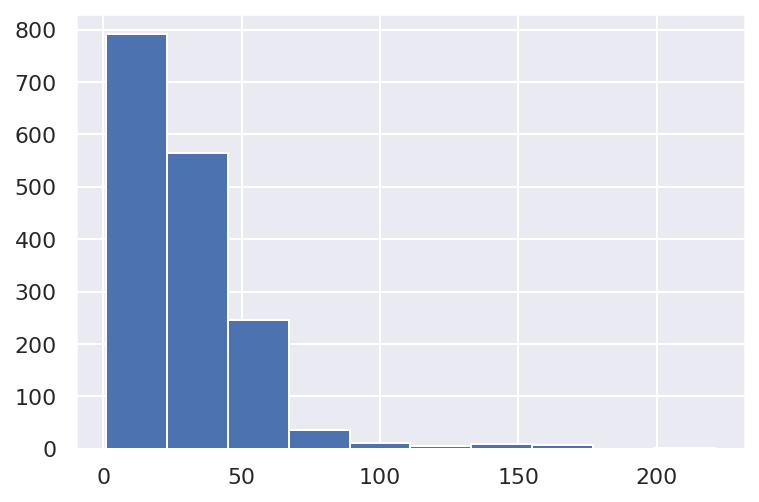

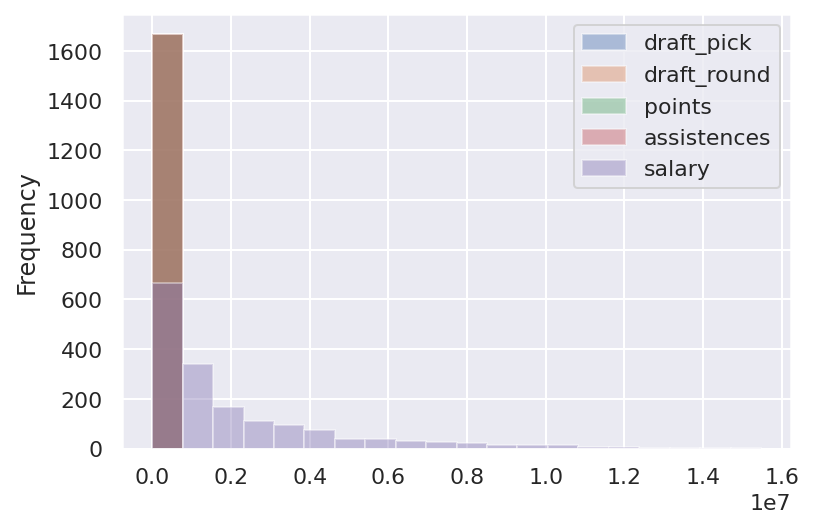

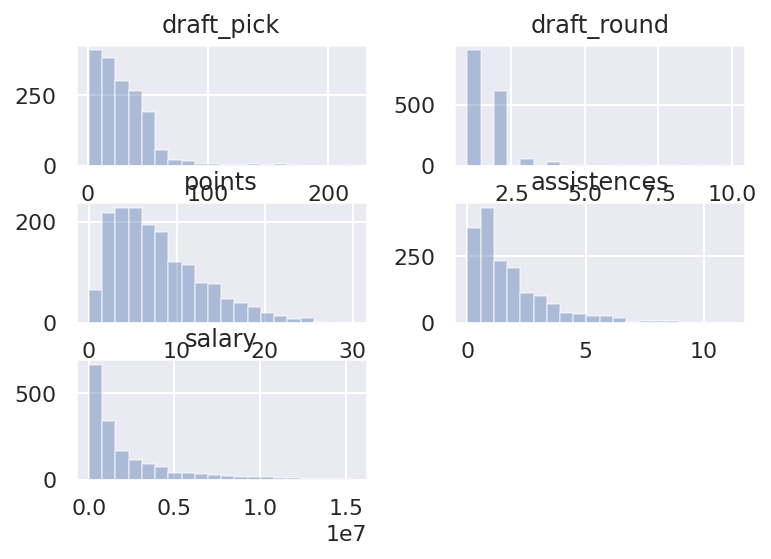

In [32]:

nba_data1['draft_pick'].hist(label='Order Of select in Draft')
dataTotals = nba_data1[['draft_pick','draft_round', 'points', 'assistences', 'salary']]

dataTotals.plot.hist(alpha=0.4, bins=20)
dataTotals.hist(alpha=0.4, bins=20)




In [33]:
#Get lenght of outliers
temp_nba_data1 = nba_data1[(nba_data1.draft_pick > 60) & (nba_data1.draft_round > 2)]
index_lst = temp_nba_data1.index.values.tolist()
len(index_lst)

79

In [34]:
#remove  outliers, I using knowleadbase, of nba for confirm that data is outliers
temp_nba_data1 = nba_data1[(nba_data1.draft_pick > 60) & (nba_data1.draft_round > 2)]
index_lst = temp_nba_data1.index.values.tolist()
nba_data1 = nba_data1.drop(index_lst)

In [35]:
# save the new csv file

from pathlib import Path  
filepath = Path('data/out.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
nba_data1.to_csv(filepath)  

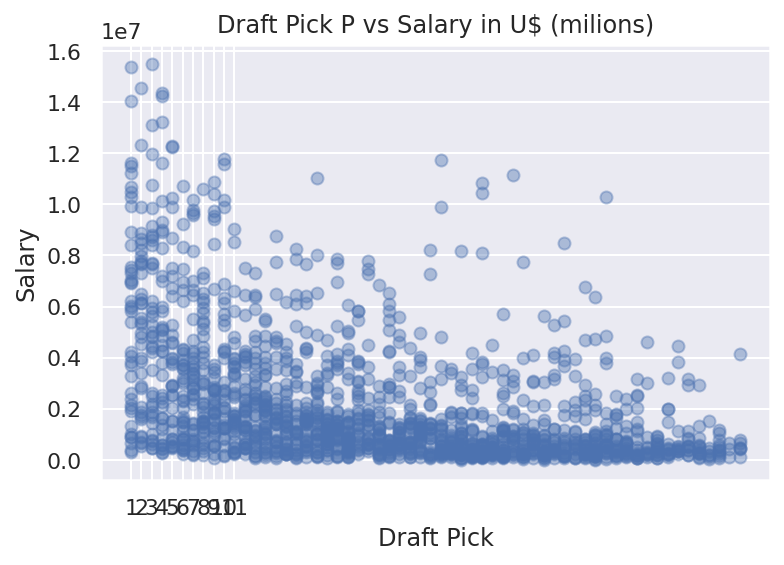

In [36]:
### Key Findings and Insights

ax = plt.axes()

plt.xticks(range(1, 12))


ax.scatter(nba_data1.draft_pick,nba_data1.salary, alpha=0.4)

# Label the axes
ax.set(xlabel='Draft Pick',
       ylabel='Salary',
       title='Draft Pick P vs Salary in U$ (milions)');




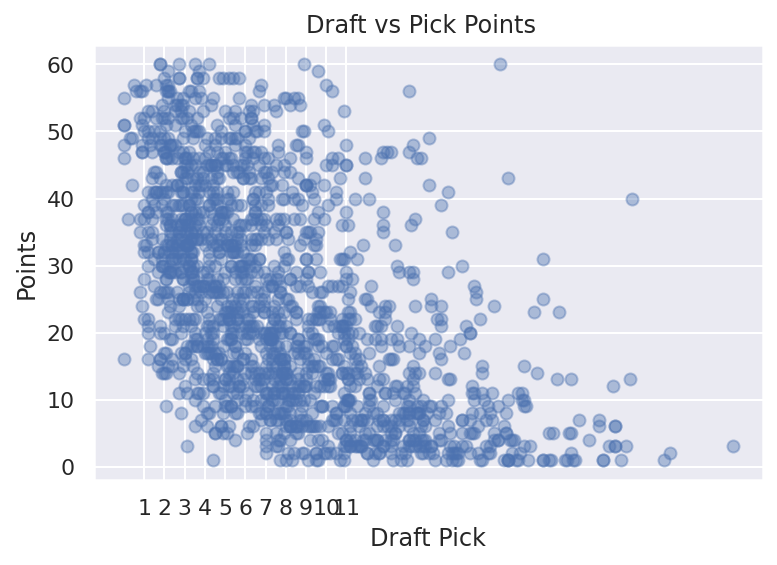

In [37]:
ax2 = plt.axes()

plt.xticks(range(1, 12))

ax2.scatter(nba_data1.points,nba_data1.draft_pick, alpha=0.4)

# Label the axes
ax2.set(xlabel='Draft Pick',
       ylabel='Points',
       title='Draft vs Pick Points  ');

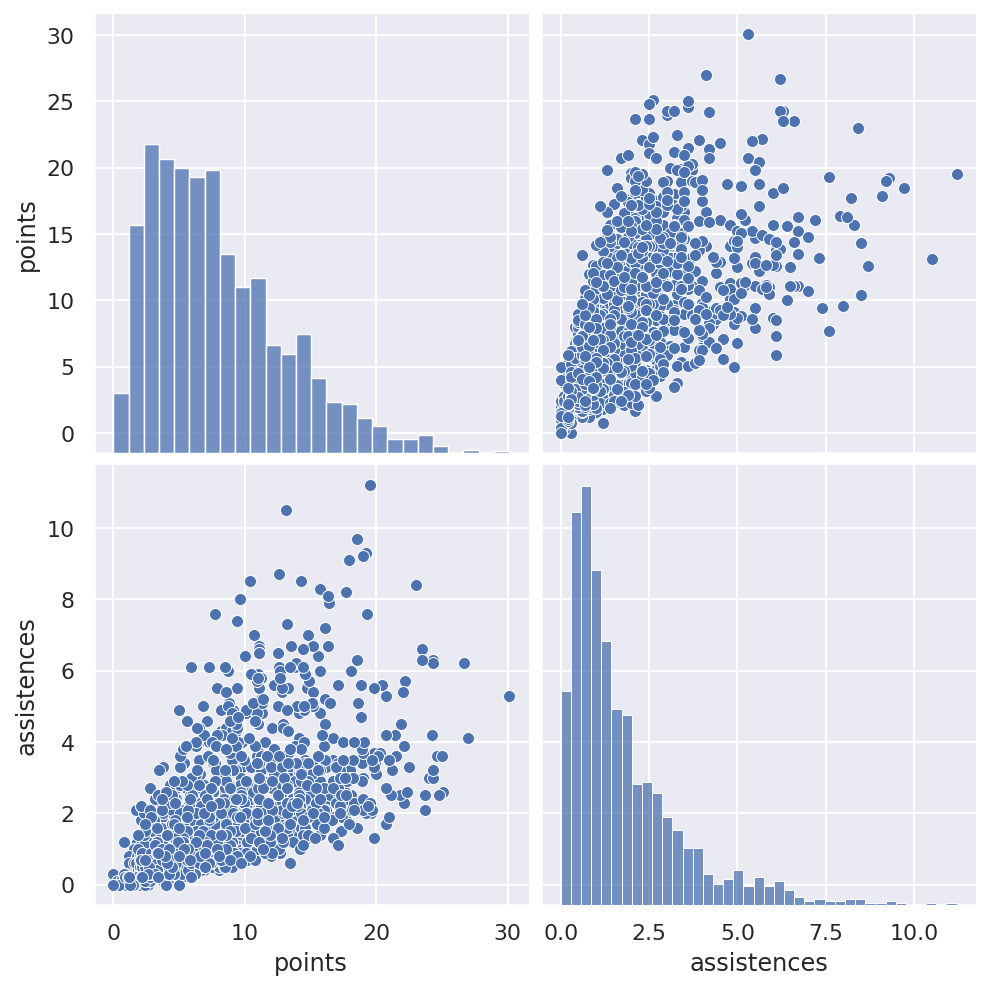

In [38]:
sns.pairplot(nba_data1,height=3.5, vars=['points', 'assistences'])

### Key Findings and Insights

    - We found an apparent relationship between number of points with numbers of assistences

- We found an apparent relationship between draft picker order with salaries

- We found an apparent relationship between draft picker with assistences and points
- We detect that relationship between number of points with years of drafts had one big fall but is stable in last 10 years
- We detect that relationship between number of assistences with years of drafts had one big fall but is stable in last 10 years
- We detact how the best colleges concentrate the biggest proporcion of best position of draft pick


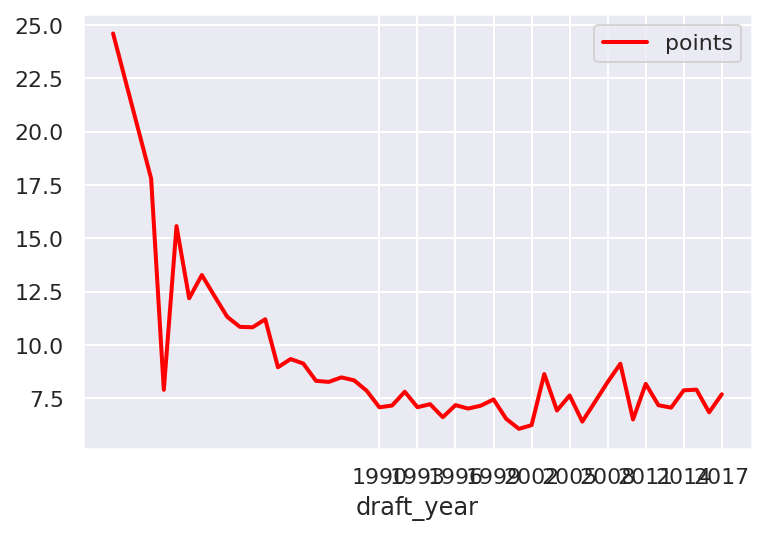

In [39]:
nba_data1["draft_year"] = pd.to_numeric(nba_data1["draft_year"], downcast="integer")
points_by_draft_year = nba_data1[['points', 'draft_year']]
points_by_draft_year = points_by_draft_year.groupby('draft_year').mean()

points_by_draft_year.plot(kind="line", color="red", linewidth=2, xticks=range(1990, 2020, 3))

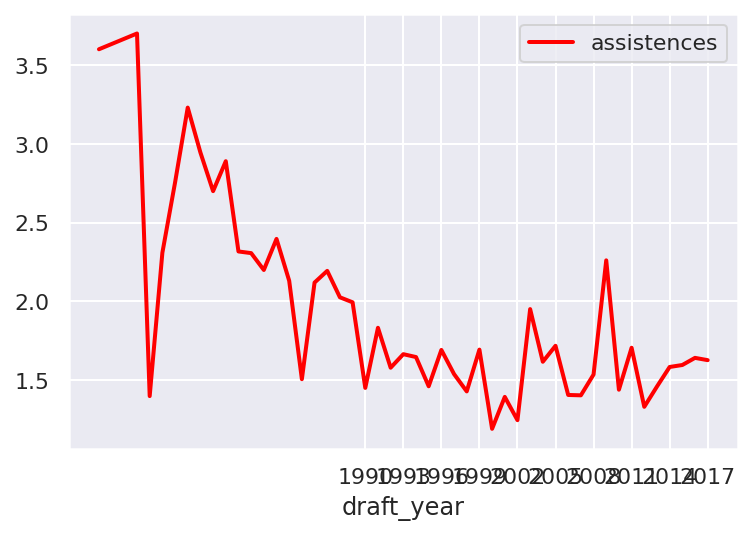

In [40]:
nba_data1["draft_year"] = pd.to_numeric(nba_data1["draft_year"], downcast="integer")
assistences_by_draft_year = nba_data1[['assistences', 'draft_year']]
assistences_by_draft_year = assistences_by_draft_year.groupby('draft_year').mean()

assistences_by_draft_year.plot(kind="line", color="red", linewidth=2, xticks=range(1990, 2020, 3))

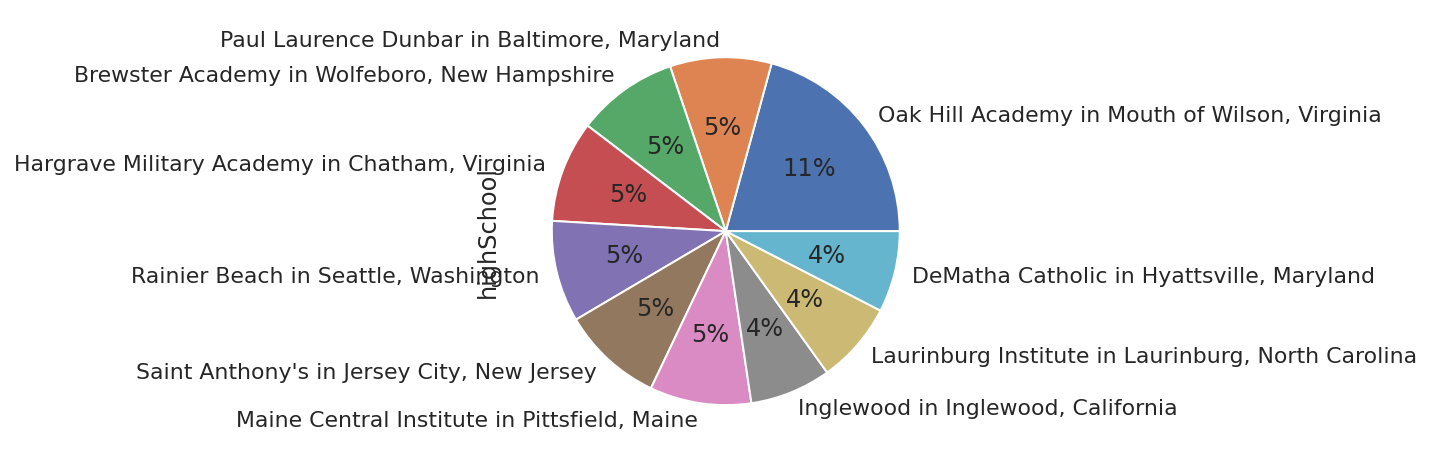

In [41]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

temp_nba_data1 = nba_data1[ (nba_data1.draft_round == 1)]


highSchool = temp_nba_data1['highSchool'].value_counts()
highSchool.head(10).plot.pie(autopct=lambda x: '{:.0f}%'.format(x*highSchool.head(10).sum()/100) )

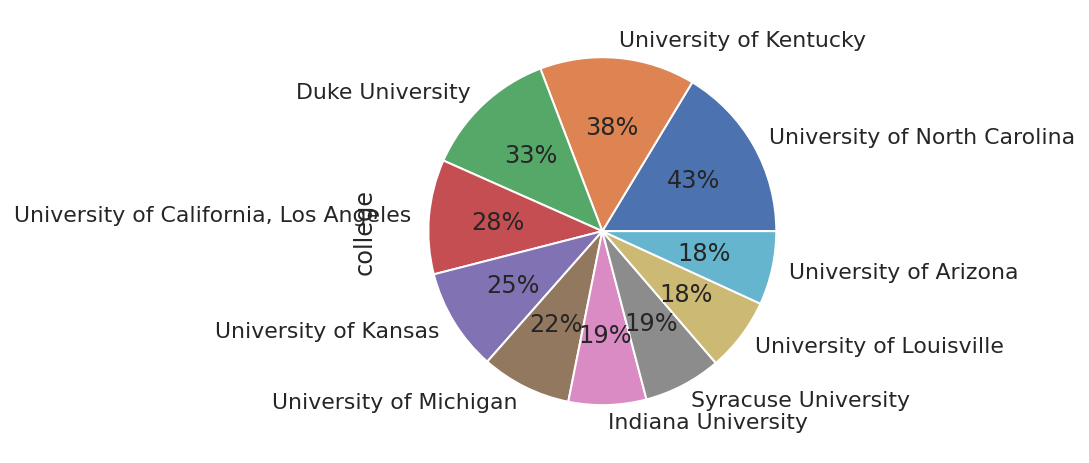

In [42]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

temp_nba_data1 = nba_data1[ (nba_data1.draft_round == 1)]


college = temp_nba_data1['college'].value_counts()
college.head(10).plot.pie(autopct=lambda x: '{:.0f}%'.format(x*college.head(10).sum()/100) )





### hypothesis

 - hypothesis 1: The Colleges and High Schools with more draft in round 1 have the best salaries of NBA
 - hypothesis 2: The Colleges and High School with more draft in round 1 have biggest points and assistences in NBA
 - hypothesis 3: The players that best statics for points and assistences have the best salaries of NBA

### Test result of hypothesis 1
TRUE, by value of occurrences of the 10 best schools in draft round 1, I could check that the salaries almost come to be the triple of other schools in mean





In [43]:
# I will use data of numbers of ocorrences of colleges and highshools for filter whichs players have in these schools
temp_nba_data1 = nba_data1[ (nba_data1.draft_round == 1)]


college = temp_nba_data1['college'].value_counts()
print(college.head(10))




highSchool = temp_nba_data1['highSchool'].value_counts()
print(highSchool.head(10))


University of North Carolina             43
University of Kentucky                   38
Duke University                          33
University of California, Los Angeles    28
University of Kansas                     25
University of Michigan                   22
Indiana University                       19
Syracuse University                      19
University of Louisville                 18
University of Arizona                    18
Name: college, dtype: int64
Oak Hill Academy in Mouth of Wilson, Virginia         11
Paul Laurence Dunbar in Baltimore, Maryland            5
Brewster Academy in Wolfeboro, New Hampshire           5
Hargrave Military Academy in Chatham, Virginia         5
Rainier Beach in Seattle, Washington                   5
Saint Anthony's in Jersey City, New Jersey             5
Maine Central Institute in Pittsfield, Maine           5
Inglewood in Inglewood, California                     4
Laurinburg Institute in Laurinburg, North Carolina     4
DeMatha Catholic in

All of players:  1587
Number of Colleges:  349
Number of High Schools:  1205
Number of Players in Best Schools:  945
Number of Players in Others:  642
Mean of salaries of Best Schools:  2965222.75
Mean of salaries of others Schools:  1072140.125


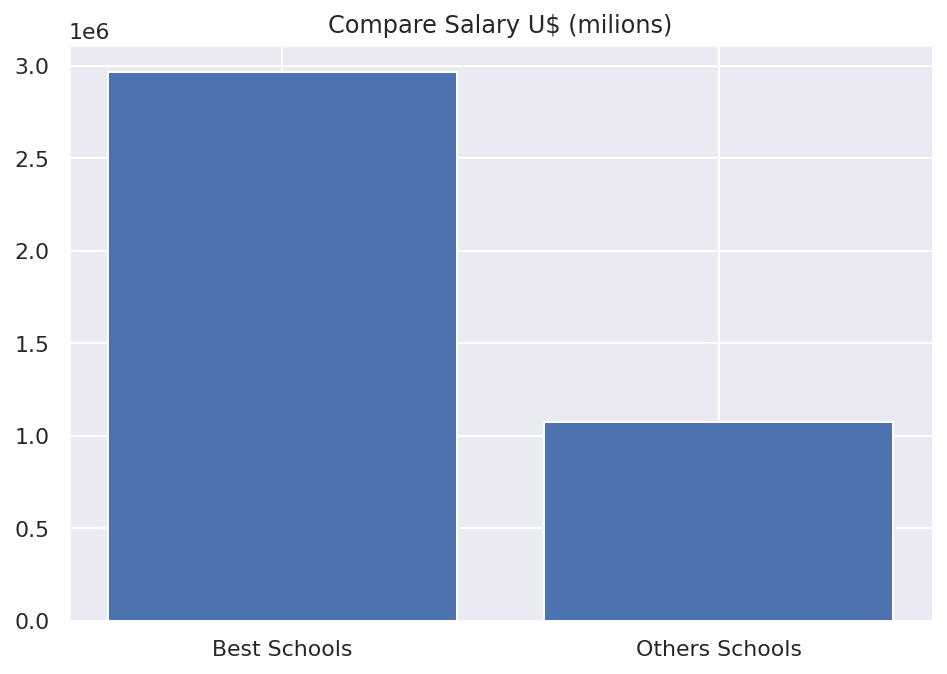

In [44]:
biggest_schools = nba_data1[ (nba_data1.draft_round == 1) & (len(nba_data1.college) >= 18) & (len(nba_data1.highSchool) >= 4) ]
biggest_indices = biggest_schools.index.tolist()
minors_schools = nba_data1[~nba_data1.index.isin(biggest_schools.index.tolist())]


print('All of players: ', nba_data1.shape[0])
print('Number of Colleges: ',len(nba_data1.college.unique()))
print('Number of High Schools: ', len(nba_data1.highSchool.unique()))
print('Number of Players in Best Schools: ', biggest_schools.shape[0])
print('Number of Players in Others: ', minors_schools.shape[0])
print('Mean of salaries of Best Schools: ',biggest_schools.salary.mean())
print('Mean of salaries of others Schools: ',minors_schools.salary.mean())
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

salaries_labels = ['Best Schools' , 'Others Schools']
salaries_values = [int(biggest_schools.salary.mean()) ,int(minors_schools.salary.mean()) ]
ax.bar(salaries_labels,salaries_values)
ax.set_title('Compare Salary U$ (milions)')
plt.show()

### Suggestions for next steps in analyzing this data

 - Analyse if players characteristics like weight, position, height or shoots can influence ir their salaries in nba
 - Analyse if age and origin of players can influence the order of draft pick
 - Analyse whichs characteristics have best statics in games in nba, and if age and origan can be influences the results

### Quality of dataset and requets for more data

The general quality of this data set is satisfactory for a superficial analysis of nba draft, we can raise that ten colleges concentrate basicly 60% of best positions of draft of nba. With other statics data, in this dataset, will could possible too do analyses of what results the best positions of NBA draft got it in yours carrers besides milionaries salaries. But for analyses what causes for the colleges had the best positions in draft, we need the datas bellow, of players before to become profissionals

- Assistances
- Efective Field Goal
- Efective Field Goal 3
- Free throws
- Games
- Player Efficiency Rating
- Points
- Total Rebounds
- Win Shares
- Effective Field Goal